Data processing

In [ ]:
import os
import pandas as pd
import numpy as np
import emoji
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
current_p=os.getcwd()
file_p=os.path.join(current_p,'Reddit Data/raw')
file_list=os.listdir(file_p)

In [ ]:
data_raw=pd.read_csv(os.path.join(file_p,file_list[0]))
for i in range(1,len(file_list)):
    df=pd.read_csv(os.path.join(file_p,file_list[i]))
    data_raw=data_raw.append(df,ignore_index=True)

In [ ]:
data_raw.sort_values(by=['Publish Date'],inplace=True)

In [ ]:
data_raw.reset_index(drop=True,inplace=True)

In [ ]:
data_raw.shape

(1765366, 12)

In [ ]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1765366 entries, 0 to 1765365
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Post ID                 object 
 1   Title                   object 
 2   Url                     object 
 3   Author                  object 
 4   Score                   int64  
 5   Publish Date            object 
 6   Total No. of Comments   int64  
 7   Permalink               object 
 8   Flair                   object 
 9   Text                    object 
 10  Up Vote Ratio           float64
 11  No. of Awards Received  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 161.6+ MB


In [ ]:
data_raw.Flair.unique()

array([nan, 'YOLO', 'Stocks', 'Question', 'Options', 'Shitpost',
       'Fundamentals', 'Energy', 'Technicals', 'Biotech', 'tag me pls',
       'Satire', 'Industrials', 'OP post proof or ban', 'Futures',
       'User was banned for being a faggot',
       'Shitpost - The Imitation Game',
       'OP has been banned for being a faggot', 'Retail',
       'This will be the ONLY RH post allowed today', 'Read Comments',
       '1 Report = 1 Prayer ', 'OP WAS BANNED FOR BEING A FAGGOT',
       'F for respect', 'RETARD STRENGTH', 'Market Savant',
       'Felchs Man Holes', 'check again',
       'OP has been banned for being a lying faggot', 'NO PROOF = BAN',
       'OP WAS BANNED', 'OP  has been banned for being a needy fag',
       'GRINDR', 'OP has been banned for being a fgt.',
       "idk wtf this gay shit is. OP &lt;3's DICK",
       "OP &lt;3's BIG BLACK COCK", 'OP is faggot.', "OP isn't wrong. ",
       'Gay ass title, good trade. OP is fag',
       "OP was banned for this post. Don't b

In [ ]:
def label_Flair(a_text):
    if 'Loss' in str(a_text):
        return 'loss'
    elif 'Gain' in str(a_text):
        return 'gain'
    else:
        return np.NaN

In [ ]:
data_raw['Label']=data_raw['Flair'].apply(lambda x: label_Flair(x))

In [ ]:
data_raw.Label.value_counts()

gain    134971
loss     69570
Name: Label, dtype: int64

In [ ]:
data_raw[data_raw['Label'].apply(lambda x: x in ['loss','gain'])].Flair.unique()

array(['Loss', 'Gain', 'Gain | VERU', 'Gain | FR', 'Gain | TQQQ',
       'Gain | LMT', 'Loss | NFLX', 'Gain | TSLA', 'Loss | DIS',
       'Loss | TWTR', 'Gain | TWTR', 'Loss | EDT', 'Loss | HEXO',
       'Loss | SPY', 'Loss | IVR', 'Gain | PL', 'Loss | TM'], dtype=object)

In [ ]:
data_label=data_raw[(data_raw.Label=='loss') | (data_raw.Label=='gain')].copy()

In [ ]:
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [ ]:
import emoji
import re

In [ ]:
#data_label['Emoji']=data_label['Title'].apply(lambda x: emoji.emoji_count(x))
#data_label[data_label.Emoji!=0]

,Post ID,Title,Url,Author,Score,Publish Date,Total No. of Comments,Permalink,Flair,Text,Up Vote Ratio,No. of Awards Received,Label,Title_cleaned,Emoji
31688,8ywxhj,😔,https://i.redd.it/n84nervvmz911.jpg,LordBiglesworth,48,2018-07-15 08:14:34,8,/r/wallstreetbets/comments/8ywxhj/_/,Loss,NaN,NaN,NaN,loss,:pensive_face:,1
67385,acejcv,"Shawty had them ""AAPL Bottom"" jeans, boots wit...",https://i.redd.it/cso4lcx75c821.jpg,Un-Scammable,1,2019-01-04 15:39:19,6,/r/wallstreetbets/comments/acejcv/shawty_had_t...,Gain,NaN,NaN,NaN,gain,"Shawty had them ""AAPL Bottom"" jeans, boots wit...",3
67386,acema3,DejaVu? Nobody will ever forget the 2018 Chris...,https://i.redd.it/q61a490z6c821.jpg,Un-Scammable,1,2019-01-04 15:49:07,10,/r/wallstreetbets/comments/acema3/dejavu_nobod...,Gain,NaN,NaN,NaN,gain,DejaVu? Nobody will ever forget the 2018 Chris...,5
68457,aexkq3,If I sell this will go up. Happens to me every...,https://i.redd.it/jw9wkuhfvt921.jpg,STBWB,1,2019-01-12 04:20:36,16,/r/wallstreetbets/comments/aexkq3/if_i_sell_th...,Loss,NaN,NaN,NaN,loss,If I sell this will go up. Happens to me every...,1
70437,ajngco,"Generational ""V"" Bottoms in effect✅",https://i.redd.it/q1ovlh6khjc21.jpg,Un-Scammable,1,2019-01-25 20:37:29,2,/r/wallstreetbets/comments/ajngco/generational...,Gain,NaN,NaN,NaN,gain,"Generational ""V"" Bottoms in effect:check_mark_...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1764781,x21nyr,Tomorrow move: sell these $NVDA puts ? I want ...,https://i.redd.it/dmr2v53olyk91.jpg,koenigej,1,2022-08-31 12:22:04,1,/r/wallstreetbets/comments/x21nyr/tomorrow_mov...,Gain,NaN,1.0,0.0,gain,Tomorrow move: sell these $NVDA puts ? I want ...,4
1764788,x21xmn,Do as you Wish but I am gonna 💎👏 my shit!! hed...,https://i.redd.it/jrc1binxnyk91.png,Educational_Ad6146,1,2022-08-31 12:34:47,1,/r/wallstreetbets/comments/x21xmn/do_as_you_wi...,Loss,Started February last year this is 1 of 3 acco...,1.0,0.0,loss,Do as you Wish but I am gonna :gem_stone::clap...,2
1764814,x230ki,$REGN to retest 52 wk lows with the market? 🤞 ...,https://i.redd.it/7t80ntnaxyk91.jpg,koenigej,1,2022-08-31 13:27:15,2,/r/wallstreetbets/comments/x230ki/regn_to_rete...,Gain,NaN,1.0,0.0,gain,$REGN to retest 52 wk lows with the market? :c...,5
1764867,x24u5b,$BBBY- IV (+125%) says we're 🚀🚀 to the moon!,https://i.redd.it/h57gsrvjezk91.jpg,Pale_Cut_9,1,2022-08-31 15:04:03,0,/r/wallstreetbets/comments/x24u5b/bbby_iv_125_...,Gain,Sue Gove better pitch her little hear out in t...,1.0,0.0,gain,$BBBY- IV (+125%) says we're :rocket::rocket: ...,2


In [ ]:
from nltk.corpus import stopwords #for removing stopwords
from nltk import word_tokenize #for tokenization
from nltk.stem import WordNetLemmatizer #for lemmatization
from nltk.stem import SnowballStemmer #for stemming
from string import punctuation

In [ ]:
stop = stopwords.words('english')
punc = list(punctuation)
stemmer=SnowballStemmer("english",ignore_stopwords=True)
wnl=WordNetLemmatizer()
punc_ad=[item for item in punc if item not in ['/']]
punc_ad.extend(['“','”','•','...','......','|||||','-|'])

In [ ]:
def clean_text(a_string,stem=True):
    #convert emoji
    if isinstance(a_string,str):
        a_text=emoji.demojize(a_string)
        #split text by \n
        a_list=a_text.split('\n')
        output_list=[x for x in a_list if len(x)!=0]
        #join the text
        text_temp=' '.join(output_list)
        
        #remove url using regex
        text_cleaned=re.sub(r'[\(\[]?http[s]?:[\\]?/[\\]?/?\S+',' ',text_temp)
        text_cleaned=re.sub(r'&lt;.+&gt;',' ',text_cleaned)
        #remove image & viedo
        text_cleaned=re.sub(r'\*Processing video \w+\.+\*',' ',text_cleaned)
        text_cleaned=re.sub(r'\*Processing img \w+\.+\*',' ',text_cleaned)
        #remove time
        text_cleaned=re.sub(r'\d{2}:\d{2}:\d{2}',' ',text_cleaned)
        text_cleaned=re.sub(r'\d{1,2}:\d{2} (AM)?(PM)?',' ',text_cleaned)
        
        text_cleaned=re.sub(r'’',"\'",text_cleaned)
        #text_cleaned=re.sub(r'%',"percentage",text_cleaned)
        
        #remove special char
        text_cleaned =re.sub(r'(:)+',' ',text_cleaned)
        text_cleaned = re.sub(r"\'s", " \'s", text_cleaned)
        text_cleaned = re.sub(r"\'ve", " \'ve", text_cleaned)
        text_cleaned = re.sub(r"n\'t", " n\'t", text_cleaned)
        text_cleaned = re.sub(r"\'re", " \'re", text_cleaned)
        text_cleaned = re.sub(r"\'d", " \'d", text_cleaned)
        text_cleaned = re.sub(r"\'ll", " \'ll", text_cleaned)
        #text_cleaned = re.sub(r"/", " ", text_cleaned)
        text_cleaned = re.sub(r"--", " ", text_cleaned)
        text_cleaned = re.sub(r"\\", " ", text_cleaned)
        text_cleaned = re.sub(r'"', ' ', text_cleaned)
        text_cleaned = re.sub(r'\|', ' ', text_cleaned)
        text_cleaned =re.sub(r'( )+',' ',text_cleaned)
        #word_list=text_cleaned.split()
        tokens=word_tokenize(text_cleaned.lower())
        word_list=[token for token in tokens if token not in stopwords.words('english')]
        word_list=[w for w in word_list if w not in punc_ad]
        
        if stem:
            word_list=[stemmer.stem(w) for w in word_list]
        else:
            word_list=[wnl.lemmatize(w) for w in word_list] #the lemma is used
            
        word_list=[w for w in word_list if (w not in ['amp','x200b']) and (w not in punc_ad)]
        return ' '.join(word_list).strip()
    else:
        return ''

In [ ]:
def combine(s1,s2):
    if isinstance(s2,str):
        if '[removed]' in s2:
            s2_cleaned =re.sub(r'\[removed\]',' ',s2)
            combined=s1+' '+s2_cleaned
            return combined
        else:
            combined=s1+' '+s2
            return combined
    else:
        return s1

In [ ]:
data_label['Full']=data_label.apply(lambda x: combine(x.Title,x.Text),axis=1)

In [ ]:
#clean title & text
data_label['Full_stem']=data_label['Full'].apply(lambda x: clean_text(x))
data_label['Full_lem']=data_label['Full'].apply(lambda x: clean_text(x,False))

In [ ]:
print(data_label[data_label['Post ID']=='l9j7qe'].Full.values)

['Bought at 311&amp;394 and HOLDING!! Buying more tomorrow ASAP 💎🤲 🚀🚀']


In [ ]:
print(data_label[data_label['Post ID']=='l9j7qe'].Full_stem.values)

['bought 311 394 hold buy tomorrow asap gem_ston palms_up_togeth rocket rocket']


In [ ]:
print(data_label[data_label['Post ID']=='l9j7qe'].Full_lem.values)

['bought 311 394 holding buying tomorrow asap gem_stone palms_up_together rocket rocket']


In [ ]:
data_label.shape

(204541, 16)

In [ ]:
data_label.shape

(204541, 16)

In [ ]:
data_label.Label.value_counts()

gain    134971
loss     69570
Name: Label, dtype: int64

In [ ]:
data_label['Label_encode']=data_label['Label'].apply(lambda x: 1 if x=='gain' else 0)

In [ ]:
data_label.to_csv('./Reddit Data/clean data.csv',index=False)

Explore the features

In [ ]:
import os
import pandas as pd
current_p=os.getcwd()
file_p=os.path.join(current_p,'Reddit Data/clean data.csv')
data_df=pd.read_csv(file_p)

In [ ]:
data_df[data_df['Full'].apply(lambda x: '&amp;' in x if isinstance(x,str) else False)]

,Post ID,Title,Url,Author,Score,Publish Date,Total No. of Comments,Permalink,Flair,Text,Up Vote Ratio,No. of Awards Received,Label,Full,Full_stem,Full_lem,Label_encode,Length
49,abv02w,"Not Robinhood (I'm from the EU), but what a wa...",https://www.reddit.com/r/wallstreetbets/commen...,smeyster,1,2019-01-03 03:40:11,0,/r/wallstreetbets/comments/abv02w/not_robinhoo...,Gain,&amp;#x200B;\n\nhttps://i.redd.it/q416huf8f182...,NaN,NaN,gain,"Not Robinhood (I'm from the EU), but what a wa...",robinhood 'm eu way start 2019 220,robinhood 'm eu way start 2019 220,1,18
91,aekzma,Found a pump &amp; dump - didn’t get greedy,https://i.redd.it/rkazz1msnm921.jpg,bahamabigia,1,2019-01-11 04:05:19,0,/r/wallstreetbets/comments/aekzma/found_a_pump...,Gain,NaN,NaN,NaN,gain,Found a pump &amp; dump - didn’t get greedy,found pump dump n't get greedi,found pump dump n't get greedy,1,9
112,agc0ry,BNP Said to Lose $80 Million on S&amp;P 500-Li...,https://www.bloomberg.com/news/articles/2019-0...,charliefourindia,1,2019-01-16 06:11:33,2,/r/wallstreetbets/comments/agc0ry/bnp_said_to_...,Loss,NaN,NaN,NaN,loss,BNP Said to Lose $80 Million on S&amp;P 500-Li...,bnp said lose 80 million p 500-link deriv trade,bnp said lose 80 million p 500-linked derivati...,0,11
122,ah4evp,Theta dick slaps me after market bheind the cu...,https://www.reddit.com/r/wallstreetbets/commen...,thatguywhositonlamps,1,2019-01-18 11:08:59,0,/r/wallstreetbets/comments/ah4evp/theta_dick_s...,Loss,&amp;#x200B;\n\nhttps://i.redd.it/3kdfc09op2b2...,NaN,NaN,loss,Theta dick slaps me after market bheind the cu...,theta dick slap market bheind curtain help,theta dick slap market bheind curtain help,0,12
130,ahen34,TLSA 300 puts expiring today,https://www.reddit.com/r/wallstreetbets/commen...,Mister_Squeaks,1,2019-01-19 07:28:43,0,/r/wallstreetbets/comments/ahen34/tlsa_300_put...,Loss,"&lt;blockquote class=""imgur-embed-pub"" lang=""e...",NaN,NaN,loss,TLSA 300 puts expiring today &lt;blockquote cl...,tlsa 300 put expir today bought 300 strike tsl...,tlsa 300 put expiring today bought 300 strike ...,0,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204453,x1o95q,Why am i taking 8X of the actual loss that im ...,https://www.reddit.com/r/wallstreetbets/commen...,Norvin_real,1,2022-08-31 02:57:13,0,/r/wallstreetbets/comments/x1o95q/why_am_i_tak...,Loss,Ok so im not using an leverage first of all\n\...,1.0,0.0,loss,Why am i taking 8X of the actual loss that im ...,take 8x actual loss im suppos take ok im use l...,taking 8x actual loss im supposed taking ok im...,0,72
204457,x1pheb,"$BBBY Bed, Bath &amp; Beyond: I Only Buy &amp;...",https://i.imgur.com/dylHC9H.png,KDOT_DAMN,1,2022-08-31 03:45:40,1,/r/wallstreetbets/comments/x1pheb/bbby_bed_bat...,Gain,NaN,1.0,0.0,gain,"$BBBY Bed, Bath &amp; Beyond: I Only Buy &amp;...",bbbi bed bath beyond buy hold best stock world,bbby bed bath beyond buy hold best stock world,1,16
204459,x1pkin,"$BBBY Bed, Bath &amp; Beyond: I Only Buy &amp;...",https://www.reddit.com/r/wallstreetbets/commen...,KDOT_DAMN,1,2022-08-31 03:49:08,1,/r/wallstreetbets/comments/x1pkin/bbby_bed_bat...,Gain,"https://i.imgur.com/yAVyHKR.png \n\n$BBBY Bed,...",1.0,0.0,gain,"$BBBY Bed, Bath &amp; Beyond: I Only Buy &amp;...",bbbi bed bath beyond buy hold best stock world...,bbby bed bath beyond buy hold best stock world...,1,33
204504,x20y4f,Leverage didn't affect my profit??,https://www.reddit.com/r/wallstreetbets/commen...,Norvin_real,1,2022-08-31 11:48:24,1,/r/wallstreetbets/comments/x20y4f/leverage_did...,Gain,I bought nasdaq 7 hours ago and did it on 20x ...,1.0,0.0,gain,Leverage didn't affect my profit?? I bought na...,leverag n't affect profit bought nasdaq 7 hour...,leverage n't affect profit bought nasdaq 7 hou...,1,45


In [ ]:
print(data_df[data_df['Post ID']=='x20y4f'].Full.values)

["Leverage didn't affect my profit?? I bought nasdaq 7 hours ago and did it on 20x leverage and i made around 19% gain on it but for some reason i didn't make a lot of net profit, can somone help me calc this??\n\n&amp;#x200B;\n\nhttps://preview.redd.it/b4t92okmfyk91.png?width=562&amp;format=png&amp;auto=webp&amp;s=3c37ad74bfc267c93222ce5b7914cd0f3f5bede0"]


In [ ]:
data_df.Label_encode.value_counts()

1    134971
0     69570
Name: Label_encode, dtype: int64

In [ ]:
data_df[data_df.Label_encode==1].index

Int64Index([    37,     47,     48,     49,     50,     52,     53,     54,
                58,     59,
            ...
            203931, 203933, 203935, 203936, 203937, 203939, 203946, 203949,
            203956, 203963],
           dtype='int64', length=134590)

In [ ]:
data_df['Length']=data_df.apply(lambda x: len(x.Full.split()), axis=1)

In [ ]:
data_df['Length'].describe()

count    204541.000000
mean         13.911915
std          32.238703
min           1.000000
25%           4.000000
50%           8.000000
75%          15.000000
max        4375.000000
Name: Length, dtype: float64

In [ ]:
import random
SEED=1234
random.seed(SEED)

In [ ]:
def stratified_sample(df,attribute,size):
    
    temp_df=df.copy().reset_index(drop=True)
    
    stratified_rindex=[]
    
    population=temp_df.shape[0]
    grp_count=dict(temp_df.groupby(attribute).size())
    
    for grp,index in dict(temp_df.groupby(attribute).groups).items():
        #get sample size for the current group = percentage in population * total sample size
        n_size=round(grp_count[grp]*size/population)
        if n_size>=1:
            index_list=random.sample(list(index),n_size)
            stratified_rindex.extend(index_list)
    
    check_len=len(stratified_rindex)
    if check_len>size:
        dif=check_len-size
        withdraw_index=random.sample(stratified_rindex,dif)
        stratified_rindex=[i for i in stratified_rindex if i not in withdraw_index]
        
    stratified_df=temp_df.iloc[stratified_rindex,:].copy()
    
    return stratified_df

In [ ]:
stratified_pos=stratified_sample(data_df[data_df.Label_encode==1],'Length',69570)

In [ ]:
sample_balanced=pd.concat([data_df[data_df.Label_encode==0],stratified_pos],ignore_index=True)

In [ ]:
sample_balanced.Label.value_counts()

loss    69570
gain    69570
Name: Label, dtype: int64

In [ ]:
sample_balanced.shape

(139140, 18)

In [ ]:
sample_shuffled = sample_balanced.sample(frac=1).reset_index(drop=True)

In [ ]:
sample_shuffled['lstem']=sample_shuffled['Full_stem'].apply(lambda x: len(x.split()) if isinstance(x,str) else 0)

In [ ]:
sample_shuffled.lstem.describe()

count    139140.00000
mean          9.34448
std          20.70666
min           0.00000
25%           3.00000
50%           6.00000
75%          10.00000
max        2477.00000
Name: lstem, dtype: float64

WORD CLOUD

In [ ]:
def wc_text(a_string,):
    #convert emoji
    if isinstance(a_string,str):
        a_text=emoji.demojize(a_string)
        #split text by \n
        a_list=a_text.split('\n')
        output_list=[x for x in a_list if len(x)!=0]
        #join the text
        text_temp=' '.join(output_list)
        
        #remove url using regex
        text_cleaned=re.sub(r'[\(\[]?http[s]?:[\\]?/[\\]?/?\S+',' ',text_temp)
        text_cleaned=re.sub(r'&lt;.+&gt;',' ',text_cleaned)
        text_cleaned=re.sub(r'&amp;#x200B;',' ',text_cleaned)
        #remove image & viedo
        text_cleaned=re.sub(r'\*Processing video \w+\.+\*',' ',text_cleaned)
        text_cleaned=re.sub(r'\*Processing img \w+\.+\*',' ',text_cleaned)
        text_cleaned =re.sub(r'( )+',' ',text_cleaned)
        return text_cleaned.lower()
    else:
        return ''

In [ ]:
sample_shuffled['Full_wc']=sample_shuffled['Full'].apply(lambda x: wc_text(x))

In [ ]:
pos_reddit=' '.join(sample_shuffled.loc[(sample_shuffled.Label=='gain'),'Full_wc'])
neg_reddit=' '.join(sample_shuffled.loc[(sample_shuffled.Label=='loss'),'Full_wc'])

In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [ ]:
stopwords = set(STOPWORDS)

In [ ]:
def blue_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(221, 100%%, %20d%%)" % random.randint(50, 90)  

In [ ]:
# Create wordcloud for positive reviews
wordcloud_pos = WordCloud(background_color='white', stopwords=stopwords,
                          collocations = False,
                      width=600,
                      height=500).generate(pos_reddit)

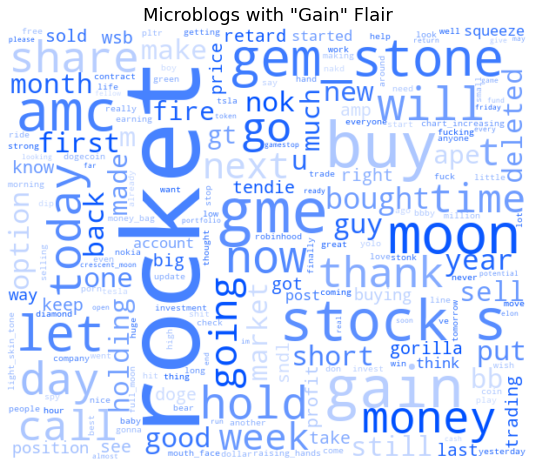

In [ ]:
#https://amueller.github.io/word_cloud/auto_examples/a_new_hope.html
#https://hslpicker.com/#943900,0.98
#https://stackoverflow.com/questions/43124136/change-the-font-color-of-generated-word-cloud
# Depict wordcloud for positive reviews
default_colors=wordcloud_pos.to_array()
plt.figure(figsize=(10,8))
plt.title('Microblogs with "Gain" Flair',size=18)
plt.imshow(wordcloud_pos.recolor(color_func=blue_color_func,random_state=8),interpolation="bilinear")
plt.imshow(default_colors, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
# Create wordcloud for positive reviews
wordcloud_neg = WordCloud(background_color='white',stopwords=stopwords,
                          collocations = False,
                      width=600,
                      height=500).generate(neg_reddit)

In [ ]:
def organe_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(23, 100%%, %29d%%)" % random.randint(50, 90)  

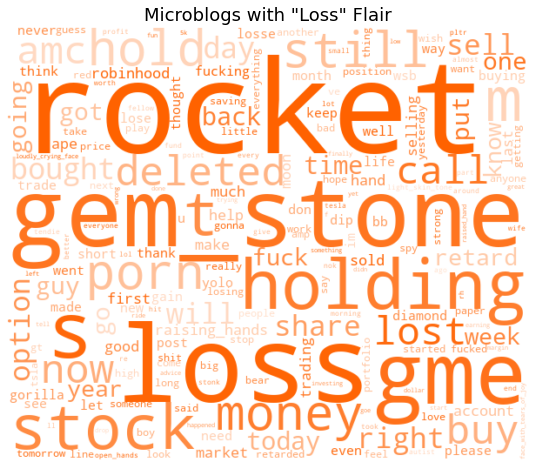

In [ ]:
# Depict wordcloud for positive reviews
default_colors=wordcloud_neg.to_array()
plt.figure(figsize=(10,8))
plt.title('Microblogs with "Loss" Flair',size=18)
plt.imshow(wordcloud_neg.recolor(color_func=organe_color_func),interpolation="bilinear")
plt.imshow(default_colors, interpolation="bilinear")
plt.axis('off')
plt.show()

Sampling

In [ ]:
pool_index=list(sample_shuffled.groupby('Label',group_keys=False).apply(lambda f: f.sample(frac=0.9)).index)
pool_df=sample_shuffled.iloc[pool_index].reset_index(drop=True).copy()
test_index=[i for i in list(sample_shuffled.index) if i not in pool_index]
train_index=list(pool_df.groupby('Label',group_keys=False).apply(lambda f: f.sample(frac=0.8)).index)
valid_index=[i for i in list(pool_df.index) if i not in train_index]

In [ ]:
for each in train_index:
    if each in valid_index:
        print(each)

In [ ]:
for each in test_index:
    if each in pool_index:
        print(each)

In [ ]:
train_df=pool_df.iloc[train_index].copy()
valid_df=pool_df.iloc[valid_index].copy()
test_df=sample_shuffled.iloc[test_index].copy()

In [ ]:
train_df.Label.value_counts()

gain    50090
loss    50090
Name: Label, dtype: int64

In [ ]:
valid_df.Label.value_counts()

gain    12523
loss    12523
Name: Label, dtype: int64

In [ ]:
test_df.Label.value_counts()

gain    6957
loss    6957
Name: Label, dtype: int64

In [ ]:
train_df.Length.describe()

count    100180.000000
mean         14.532202
std          36.814158
min           1.000000
25%           4.000000
50%           8.000000
75%          15.000000
max        4375.000000
Name: Length, dtype: float64

In [ ]:
valid_df.Length.describe()

count    25046.000000
mean        14.293220
std         36.202115
min          1.000000
25%          4.000000
50%          8.000000
75%         15.000000
max       2582.000000
Name: Length, dtype: float64

In [ ]:
test_df.Length.describe()

count    13914.000000
mean        14.897585
std         34.276185
min          1.000000
25%          4.000000
50%          8.000000
75%         15.000000
max       1133.000000
Name: Length, dtype: float64

In [ ]:
train_df[train_df.lstem==0]

,Post ID,Title,Url,Author,Score,Publish Date,Total No. of Comments,Permalink,Flair,Text,Up Vote Ratio,No. of Awards Received,Label,Full,Full_stem,Full_lem,Label_encode,Length,lstem
26956,l2uwwu,I do what I can,https://i.redd.it/157hpp1jpxc61.png,Mineral_Miscreant,1,2021-01-23 06:23:19,3,/r/wallstreetbets/comments/l2uwwu/i_do_what_i_...,Gain,NaN,1.00,0.0,gain,I do what I can,NaN,NaN,1,5,0
38961,unprlj,https://winzo.onelink.me/gu8K/451ajx1t,https://www.reddit.com/r/wallstreetbets/commen...,ShoePhysical3910,1,2022-05-12 11:51:24,0,/r/wallstreetbets/comments/unprlj/httpswinzoon...,Gain,[removed],1.00,0.0,gain,https://winzo.onelink.me/gu8K/451ajx1t,NaN,NaN,1,1,0
22840,vduaj1,https://link.cashandgo.co/u/jw1742346,https://link.cashandgo.co/u/jw1742346,FullPotential1121,1,2022-06-17 05:45:14,0,/r/wallstreetbets/comments/vduaj1/httpslinkcas...,Gain,NaN,1.00,0.0,gain,https://link.cashandgo.co/u/jw1742346,NaN,NaN,1,1,0
40334,lcd200,https://www.fool.com/investing/2021/02/03/who-...,https://www.fool.com/investing/2021/02/03/who-...,CGRealtor,1,2021-02-04 21:41:30,0,/r/wallstreetbets/comments/lcd200/httpswwwfool...,Gain,NaN,1.00,0.0,gain,https://www.fool.com/investing/2021/02/03/who-...,NaN,NaN,1,1,0
41974,l68418,...,https://i.redd.it/f920sbzciwd61.jpg,Conscious-Ease8385,1,2021-01-28 03:24:36,2,/r/wallstreetbets/comments/l68418/_/,Gain,NaN,1.00,0.0,gain,...,NaN,NaN,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71699,mgn0ob,:(,https://i.redd.it/tnz1i0sho7q61.jpg,CaseyGumball,1,2021-03-31 05:48:07,7,/r/wallstreetbets/comments/mgn0ob/_/,Loss,NaN,1.00,0.0,loss,:(,NaN,NaN,0,1,0
86872,lck4jv,Is it over?,https://www.reddit.com/r/wallstreetbets/commen...,beeronspace,6,2021-02-05 03:55:47,27,/r/wallstreetbets/comments/lck4jv/is_it_over/,Loss,[removed],0.62,0.0,loss,Is it over?,NaN,NaN,0,3,0
67873,pjyx9p,https://youtube.com/shorts/GVKucLqEo6g?feature...,https://www.reddit.com/r/wallstreetbets/commen...,Certain_Ingenuity_81,1,2021-09-08 09:43:48,3,/r/wallstreetbets/comments/pjyx9p/httpsyoutube...,Loss,[removed],1.00,0.0,loss,https://youtube.com/shorts/GVKucLqEo6g?feature...,NaN,NaN,0,1,0
71990,lrmzr7,Why did I do this,https://i.redd.it/zugqrtz6mhj61.jpg,tim3boomer,8,2021-02-25 07:44:07,5,/r/wallstreetbets/comments/lrmzr7/why_did_i_do...,Loss,NaN,0.90,0.0,loss,Why did I do this,NaN,NaN,0,5,0


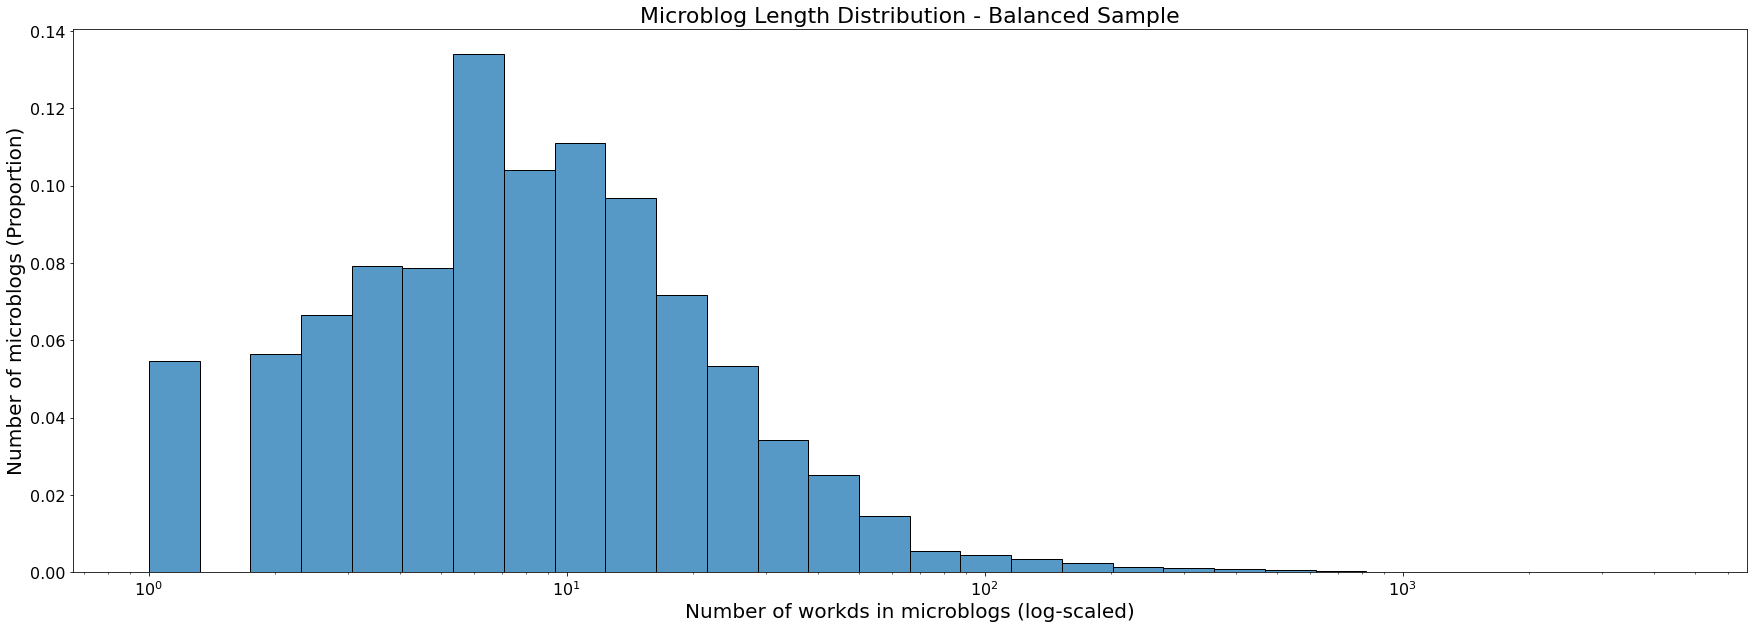

In [ ]:
# Create a new figure
plt.figure(figsize=(30,10))

#sns.boxplot(data=data_df, x="Length", y='Label')
sns.histplot(data=sample_shuffled, x="Length",bins=30,log_scale=True,stat='proportion')

plt.title('Microblog Length Distribution - Balanced Sample', size=22)
plt.xlabel('Number of workds in microblogs (log-scaled)',size=20)
plt.ylabel('Number of microblogs (Proportion)',size=20)
plt.xticks(size=16)
plt.yticks(size=16)
plt.show()

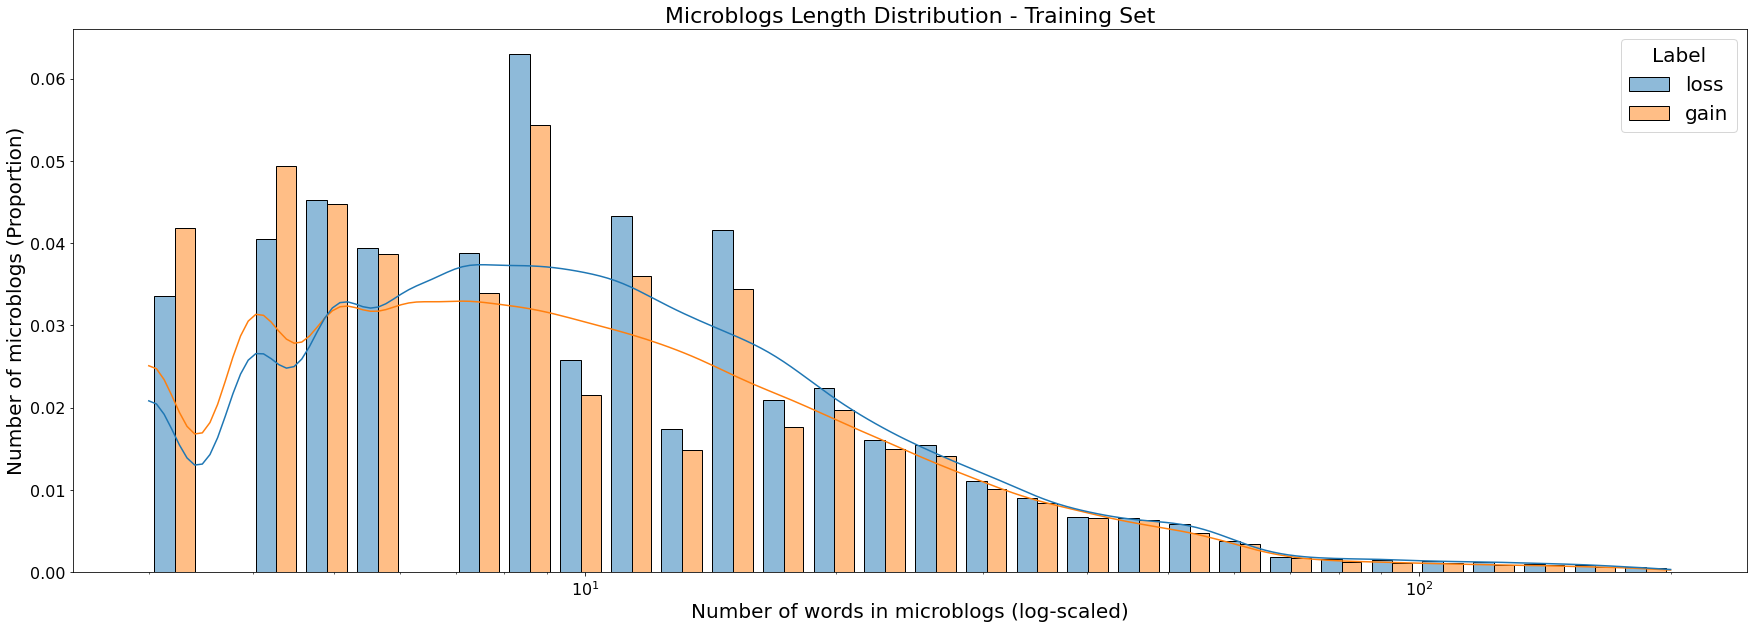

In [ ]:
# Create a new figure
plt.figure(figsize=(30,10))

sns.histplot(data=train_df[(train_df.Length>=3) & (train_df.Length<=200)], x="Length", hue="Label", 
             multiple="dodge", bins=30,shrink=.8,stat='proportion',kde=True,hue_order=['loss','gain'],log_scale=True)

plt.title('Microblogs Length Distribution - Training Set', size=22)
plt.xlabel('Number of words in microblogs (log-scaled)', size=20)
plt.ylabel('Number of microblogs (Proportion)', size=20)
plt.xticks(size=16)
plt.yticks(size=16)
plt.rc('legend', **{'fontsize':20,'title_fontsize':20})
plt.show()


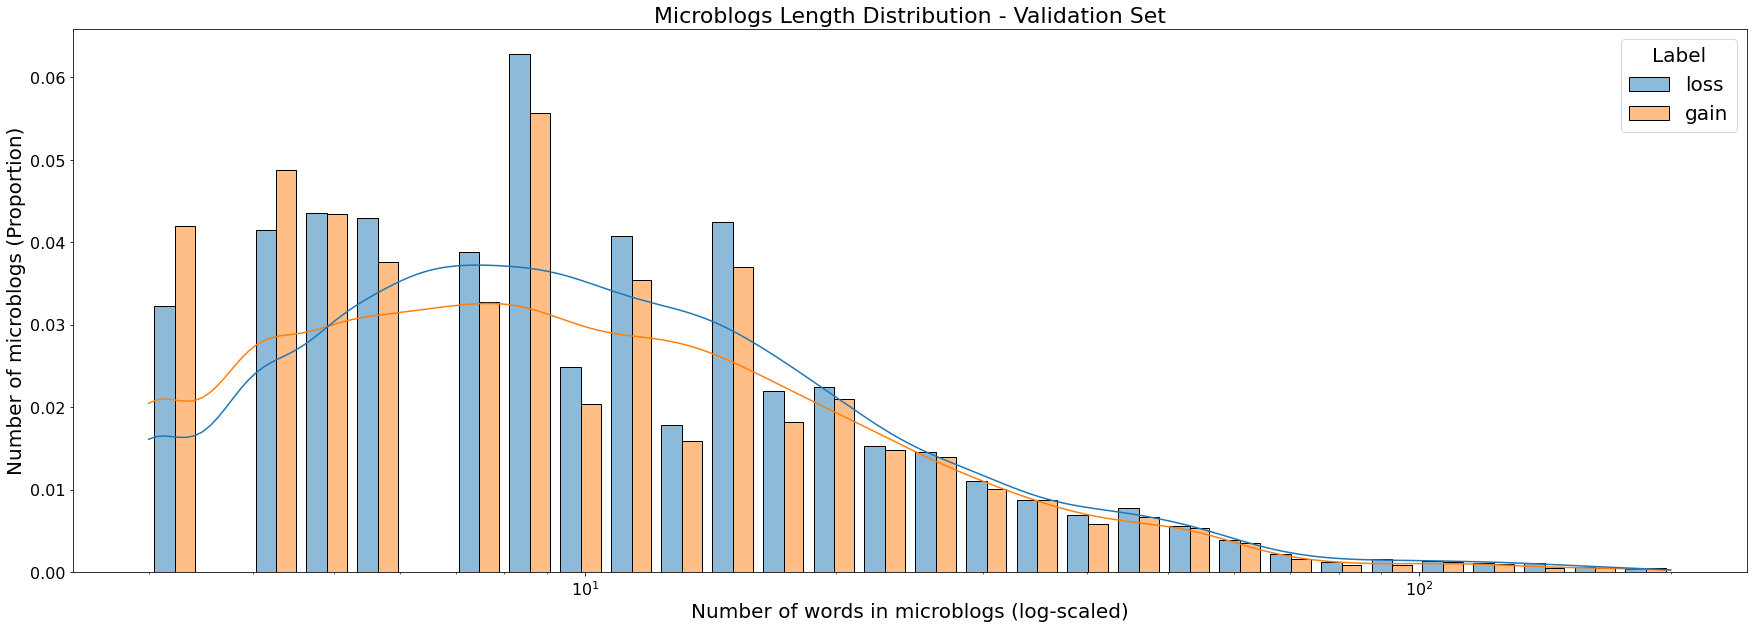

In [ ]:
# Create a new figure
plt.figure(figsize=(30,10))

sns.histplot(data=valid_df[(valid_df.Length>=3) & (valid_df.Length<=200)], x="Length", hue="Label", 
             multiple="dodge", bins=30,shrink=.8,stat='proportion',kde=True,hue_order=['loss','gain'],log_scale=True)

plt.title('Microblogs Length Distribution - Validation Set', size=22)
plt.xlabel('Number of words in microblogs (log-scaled)', size=20)
plt.ylabel('Number of microblogs (Proportion)', size=20)
plt.xticks(size=16)
plt.yticks(size=16)
plt.rc('legend', **{'fontsize':20,'title_fontsize':20})
plt.show()

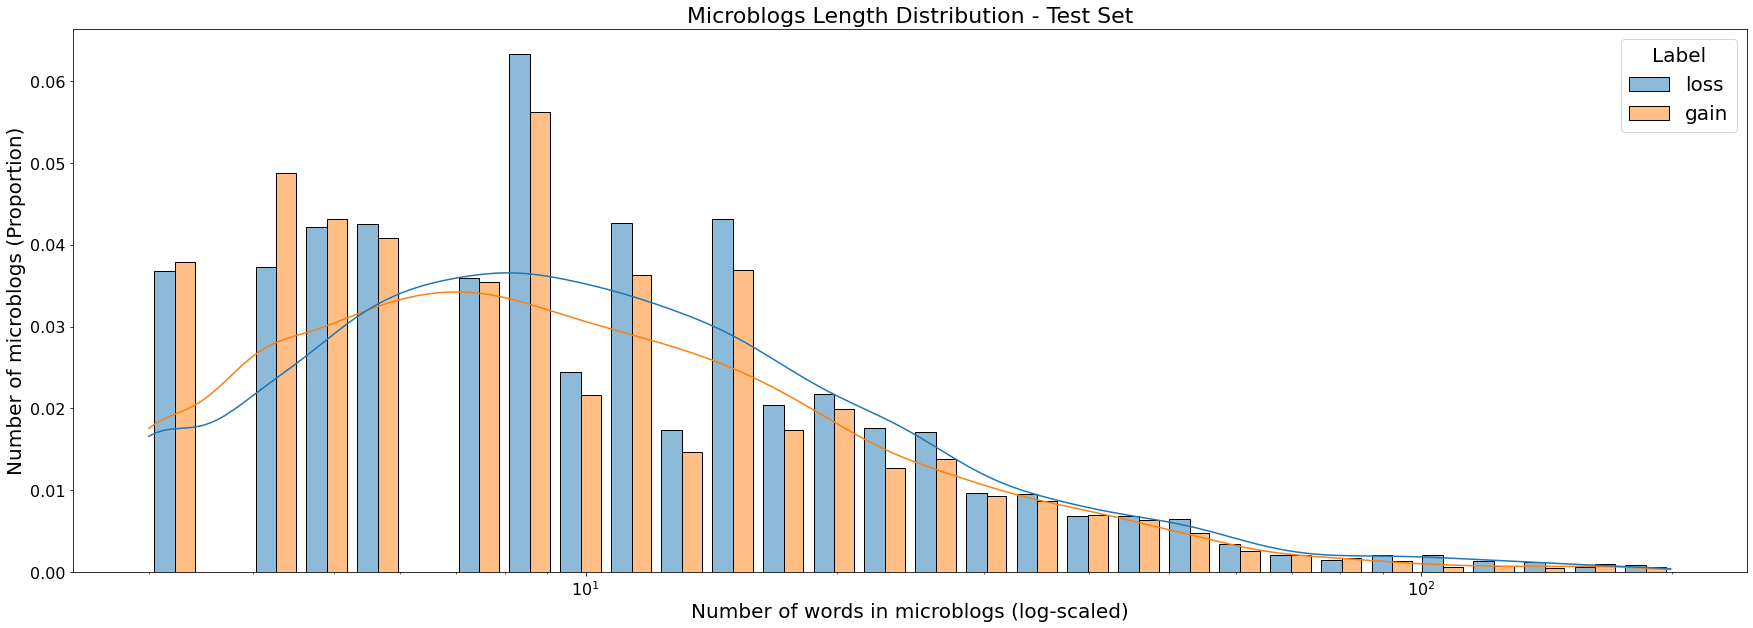

In [ ]:
# Create a new figure
plt.figure(figsize=(30,10))

sns.histplot(data=test_df[(test_df.Length>=3) & (test_df.Length<=200)], x="Length", hue="Label",hue_order=['loss','gain'], 
             multiple="dodge", bins=30,shrink=.8,stat='proportion',kde=True,log_scale=True)

plt.title('Microblogs Length Distribution - Test Set', size=22)
plt.xlabel('Number of words in microblogs (log-scaled)', size=20)
plt.ylabel('Number of microblogs (Proportion)', size=20)
plt.xticks(size=16)
plt.yticks(size=16)
plt.rc('legend', **{'fontsize':20,'title_fontsize':20})
plt.show()

In [ ]:
train_df[(train_df.Length>=3) & (train_df.Length<=200)].to_csv('./Reddit Data/train_full.csv',index=False)
test_df[(test_df.Length>=3) & (test_df.Length<=200)].to_csv('./Reddit Data/test_full.csv',index=False)
valid_df[(valid_df.Length>=3) & (valid_df.Length<=200)].to_csv('./Reddit Data/valid_full.csv',index=False)

In [ ]:
train_df[(train_df.Length>=3) & (train_df.Length<=200)&(train_df.lstem>0)]

,Post ID,Title,Url,Author,Score,Publish Date,Total No. of Comments,Permalink,Flair,Text,Up Vote Ratio,No. of Awards Received,Label,Full,Full_stem,Full_lem,Label_encode,Length,lstem
24896,laeri7,Just holding wont keep the price up.. I would ...,https://www.reddit.com/r/wallstreetbets/commen...,UM_CHITB6992,1,2021-02-02 08:31:37,0,/r/wallstreetbets/comments/laeri7/just_holding...,Gain,[removed],1.0,0.0,gain,Just holding wont keep the price up.. I would ...,hold wont keep price .. would sell ..,holding wont keep price .. would sell ..,1,13,8
59465,lhs2u1,"If you can’t fight the mouse, join the mouse. 💎🐭",https://i.redd.it/qlgntlfudwg61.jpg,TwilightMD,1,2021-02-12 06:11:38,3,/r/wallstreetbets/comments/lhs2u1/if_you_cant_...,Gain,NaN,1.0,0.0,gain,"If you can’t fight the mouse, join the mouse. 💎🐭",ca n't fight mous join mous gem_ston mouse_fac,ca n't fight mouse join mouse gem_stone mouse_...,1,10,8
48937,o1yjhk,UNQU Let’s make this Fly..yolo…Has great Poten...,https://www.reddit.com/r/wallstreetbets/commen...,Rojo932,1,2021-06-18 00:26:40,2,/r/wallstreetbets/comments/o1yjhk/unqu_lets_ma...,Gain,[removed],1.0,0.0,gain,UNQU Let’s make this Fly..yolo…Has great Poten...,unqu let 's make fli .. yolo…ha great potenti,unqu let 's make fly .. yolo…has great potential,1,7,9
50153,lilsv5,Recovering to buy more GME 🚀🚀🚀🚀🚀,https://i.redd.it/360fo0d0c4h61.jpg,Rumpelstiltskin112,1,2021-02-13 08:55:36,2,/r/wallstreetbets/comments/lilsv5/recovering_t...,Gain,NaN,1.0,0.0,gain,Recovering to buy more GME 🚀🚀🚀🚀🚀,recov buy gme rocket rocket rocket rocket rocket,recovering buy gme rocket rocket rocket rocket...,1,6,8
61201,m0loop,Over $100 profit per share for 200 shares if i...,https://i.redd.it/t29lvii4gul61.jpg,GreenmileApp,1,2021-03-09 05:01:32,10,/r/wallstreetbets/comments/m0loop/over_100_pro...,Gain,NaN,1.0,0.0,gain,Over $100 profit per share for 200 shares if i...,100 profit per share 200 share sell f 'm hold,100 profit per share 200 share sell f 'm holding,1,16,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121760,pp09ep,I belong here. This is Wendy’s how may I take ...,https://i.redd.it/jfi1nx53rqn71.jpg,LostLifeSavingsOnGME,1,2021-09-16 08:12:56,3,/r/wallstreetbets/comments/pp09ep/i_belong_her...,Loss,NaN,1.0,0.0,loss,I belong here. This is Wendy’s how may I take ...,belong wendi 's may take order,belong wendy 's may take order,0,12,6
63337,l6ojnj,Large GME naked put option loss after GME stoc...,https://www.reddit.com/r/wallstreetbets/commen...,Autist_loves_tendies,1,2021-01-28 16:01:42,0,/r/wallstreetbets/comments/l6ojnj/large_gme_na...,Loss,[removed],1.0,0.0,loss,Large GME naked put option loss after GME stoc...,larg gme nake put option loss gme stock goe 400,large gme naked put option loss gme stock go 400,0,12,10
104659,nwpjjf,Hodling cause I know my fellow apes will come ...,https://i.redd.it/ttmcf9g0cg471.jpg,maickel8178,3,2021-06-11 00:52:04,0,/r/wallstreetbets/comments/nwpjjf/hodling_caus...,Loss,NaN,0.8,0.0,loss,Hodling cause I know my fellow apes will come ...,hodl caus know fellow ape come back gem_ston r...,hodling cause know fellow ape come back gem_st...,0,14,9
115118,laxyn0,Not a lot but it’s honest work. Let’s get them...,https://i.redd.it/8dr9tb7b03f61.jpg,TDR0721,1,2021-02-03 02:19:59,0,/r/wallstreetbets/comments/laxyn0/not_a_lot_bu...,Loss,NaN,1.0,0.0,loss,Not a lot but it’s honest work. Let’s get them...,lot 's honest work let 's get hedgi rocket gem...,lot 's honest work let 's get hedgies rocket g...,0,12,13


In [ ]:
train_df.shape

(100180, 19)

In [ ]:
train_df['Tokens']=train_df['Full_stem'].apply(lambda x: x.split() if isinstance(x,str) else x)

valid_df['Tokens']=valid_df['Full_stem'].apply(lambda x: x.split() if isinstance(x,str) else x)

test_df['Tokens']=test_df['Full_stem'].apply(lambda x: x.split() if isinstance(x,str) else x)

In [ ]:
train_df[(train_df.Length>=3) & (train_df.Length<=200)&(train_df.lstem>0)][['Label_encode','Full_stem']].to_csv('./Reddit Data/train.csv',index=False)
test_df[(test_df.Length>=3) & (test_df.Length<=200)&(test_df.lstem>0)][['Label_encode','Full_stem']].to_csv('./Reddit Data/test.csv',index=False)
valid_df[(valid_df.Length>=3) & (valid_df.Length<=200)&(valid_df.lstem>0)][['Label_encode','Full_stem']].to_csv('./Reddit Data/valid.csv',index=False)

In [ ]:
train_df[(train_df.Length>=3) & (train_df.Length<=200)&(train_df.lstem>0)][['Label_encode','Tokens']].to_json('./Reddit Data/train.json',orient="records",lines=True)
test_df[(test_df.Length>=3) & (test_df.Length<=200)&(test_df.lstem>0)][['Label_encode','Tokens']].to_json('./Reddit Data/test.json',orient="records",lines=True)
valid_df[(valid_df.Length>=3) & (valid_df.Length<=200)&(valid_df.lstem>0)][['Label_encode','Tokens']].to_json('./Reddit Data/.json',orient="records",lines=True)

In [ ]:
import pandas as pd
import os
current_p=os.getcwd()
train=pd.read_csv(os.path.join(current_p,'Reddit Data/train_full.csv'))
train_shuffled=train.sample(frac=1,random_state=1234).reset_index(drop=True).copy()
train_shuffled['Tokens']=train_shuffled['Full_stem'].apply(lambda x: x.split() if isinstance(x,str) else x)
train_shuffled.to_csv('./Reddit Data/train_shuffled.csv',index=False)
train_shuffled[train_shuffled.lstem>0][['Label_encode','Full_stem']].to_csv('./Reddit Data/train.csv',index=False)
train_shuffled[train_shuffled.lstem>0][['Label_encode','Tokens']].to_json('./Reddit Data/train.json',orient="records",lines=True)

In [ ]:
import pandas as pd
import os
current_p=os.getcwd()
train=pd.read_csv(os.path.join(current_p,'Reddit Data/train_shuffled.csv'))

In [ ]:
train[train.lstem>=3][['Label_encode','Tokens']].to_json('./Reddit Data/train_lstem3.json',orient="records",lines=True)

In [ ]:
valid=pd.read_csv(os.path.join(current_p,'Reddit Data/valid_shuffled.csv'))
valid[valid.lstem>=3][['Label_encode','Tokens']].to_json('./Reddit Data/valid_lstem3.json',orient="records",lines=True)

In [ ]:
test=pd.read_csv(os.path.join(current_p,'Reddit Data/test_shuffled.csv'))
test[test.lstem>=3][['Label_encode','Tokens']].to_json('./Reddit Data/test_lstem3.json',orient="records",lines=True)

In [ ]:
valid=pd.read_csv(os.path.join(current_p,'Reddit Data/valid_full.csv'))
valid_shuffled=valid.sample(frac=1,random_state=1234).reset_index(drop=True).copy()
valid_shuffled['Tokens']=valid_shuffled['Full_stem'].apply(lambda x: x.split() if isinstance(x,str) else x)
valid_shuffled.to_csv('./Reddit Data/valid_shuffled.csv',index=False)
valid_shuffled[valid_shuffled.lstem>0][['Label_encode','Full_stem']].to_csv('./Reddit Data/valid.csv',index=False)
valid_shuffled[valid_shuffled.lstem>0][['Label_encode','Tokens']].to_json('./Reddit Data/valid.json',orient="records",lines=True)

In [ ]:
test=pd.read_csv(os.path.join(current_p,'Reddit Data/test_full.csv'))
test_shuffled=test.sample(frac=1,random_state=1234).reset_index(drop=True).copy()
test_shuffled['Tokens']=test_shuffled['Full_stem'].apply(lambda x: x.split() if isinstance(x,str) else x)
test_shuffled.to_csv('./Reddit Data/test_shuffled.csv',index=False)
test_shuffled[test_shuffled.lstem>0][['Label_encode','Full_stem']].to_csv('./Reddit Data/test.csv',index=False)
test_shuffled[test_shuffled.lstem>0][['Label_encode','Tokens']].to_json('./Reddit Data/test.json',orient="records",lines=True)

In [ ]:
test_shuffled.shape,test.shape

((12300, 20), (12300, 19))

In [ ]:
valid_shuffled.shape,valid.shape

((22185, 20), (22185, 19))

In [ ]:
train_shuffled.shape,train.shape

((88590, 20), (88590, 19))

In [ ]:
valid_shuffled[:5000]

,Label_encode,Full_stem,Tokens
0,1,wti 5 green today,"[wti, 5, green, today]"
1,1,final turn green boy loudly_crying_fac loudly_...,"[final, turn, green, boy, loudly_crying_fac, l..."
2,0,bbbi fuck 'm convinc last week pump dump avoid...,"[bbbi, fuck, 'm, convinc, last, week, pump, du..."
3,0,manipul market look like / delet,"[manipul, market, look, like, /, delet]"
4,0,'d like declar retard hold moon thoo rocket ro...,"['d, like, declar, retard, hold, moon, thoo, r..."
...,...,...,...
4995,1,spce rocket rocket rocket eow ape gorilla gori...,"[spce, rocket, rocket, rocket, eow, ape, goril..."
4996,1,mean could post,"[mean, could, post]"
4997,0,250 call 25k share 100k drain… reset game bagh...,"[250, call, 25k, share, 100k, drain…, reset, g..."
4998,0,someon know noth stock lost half money amc bb ...,"[someon, know, noth, stock, lost, half, money,..."


In [ ]:
train=pd.read_csv(os.path.join(current_p,'Reddit Data/train_shuffled.csv'))

In [ ]:
train[train.lstem==0]

,Post ID,Title,Url,Author,Score,Publish Date,Total No. of Comments,Permalink,Flair,Text,Up Vote Ratio,No. of Awards Received,Label,Full,Full_stem,Full_lem,Label_encode,Length,lstem,Tokens
523,r2xmfq,How am I doing?,https://i.redd.it/7w5ijai0g0281.jpg,throwrahousearrest,1,2021-11-27 08:47:01,4,/r/wallstreetbets/comments/r2xmfq/how_am_i_doing/,Loss,NaN,1.0,0.0,loss,How am I doing?,NaN,NaN,0,4,0,NaN
2145,lnm99b,It is over?,https://i.redd.it/detigtnw4hi61.png,czullo,1,2021-02-20 05:03:12,5,/r/wallstreetbets/comments/lnm99b/it_is_over/,Loss,NaN,1.0,0.0,loss,It is over?,NaN,NaN,0,3,0,NaN
2172,l732g9,"Down, not out",https://www.reddit.com/r/wallstreetbets/commen...,Klouri,1,2021-01-29 04:26:09,0,/r/wallstreetbets/comments/l732g9/down_not_out/,Loss,[removed],1.0,0.0,loss,"Down, not out",NaN,NaN,0,3,0,NaN
2712,p6agv7,Is this how you do it?,https://i.redd.it/i34pyp6cyyh71.jpg,jols69,1,2021-08-18 05:23:02,0,/r/wallstreetbets/comments/p6agv7/is_this_how_...,Loss,NaN,1.0,0.0,loss,Is this how you do it?,NaN,NaN,0,6,0,NaN
3742,oc0muj,How about now?,https://i.redd.it/g1vi53iikp871.jpg,Gainsvillest,1,2021-07-02 12:12:18,6,/r/wallstreetbets/comments/oc0muj/how_about_now/,Loss,NaN,1.0,0.0,loss,How about now?,NaN,NaN,0,3,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86665,lbvupr,What is this? Why him?,https://www.reddit.com/r/wallstreetbets/commen...,kneznik,1,2021-02-04 06:26:44,0,/r/wallstreetbets/comments/lbvupr/what_is_this...,Loss,[removed],1.0,0.0,loss,What is this? Why him?,NaN,NaN,0,5,0,NaN
87262,mv8ou9,We did it,https://i.redd.it/efzt45oilgu61.jpg,Several-Bobcat3637,1,2021-04-21 15:04:01,1,/r/wallstreetbets/comments/mv8ou9/we_did_it/,Gain,NaN,1.0,0.0,gain,We did it,NaN,NaN,1,3,0,NaN
87887,irnh9o,Before and after,https://www.reddit.com/gallery/irnh9o,geb161,1,2020-09-13 09:44:57,0,/r/wallstreetbets/comments/irnh9o/before_and_a...,Loss,NaN,1.0,0.0,loss,Before and after,NaN,NaN,0,3,0,NaN
87915,lbrt33,Its all about...,https://www.reddit.com/r/wallstreetbets/commen...,BR_Valentine,1,2021-02-04 03:45:28,0,/r/wallstreetbets/comments/lbrt33/its_all_about/,Gain,[removed],1.0,0.0,gain,Its all about...,NaN,NaN,1,3,0,NaN


In [ ]:
test=pd.read_csv(os.path.join(current_p,'Reddit Data/test_shuffled.csv'))

In [ ]:
test[test.lstem==0]

,Post ID,Title,Url,Author,Score,Publish Date,Total No. of Comments,Permalink,Flair,Text,Up Vote Ratio,No. of Awards Received,Label,Full,Full_stem,Full_lem,Label_encode,Length,lstem,Tokens
1387,l7232f,WE DID IT,https://i.redd.it/c2qbszq9s3e61.jpg,Number070500,1,2021-01-29 03:52:38,0,/r/wallstreetbets/comments/l7232f/we_did_it/,Gain,NaN,1.0,0.0,gain,WE DID IT,NaN,NaN,1,3,0,NaN
2618,l9z55r,WE CAN DO THIS,https://youtu.be/KPhqU--Mq1A,Redlion444,1,2021-02-01 20:13:55,0,/r/wallstreetbets/comments/l9z55r/we_can_do_this/,Gain,NaN,1.0,0.0,gain,WE CAN DO THIS,NaN,NaN,1,4,0,NaN
3125,gicnd1,&lt;Insert Coin to Continue&gt;,https://i.redd.it/w7pca8zhkcy41.jpg,Sledgahammer,1,2020-05-13 00:51:12,10,/r/wallstreetbets/comments/gicnd1/insert_coin_...,Loss,NaN,1.0,0.0,loss,&lt;Insert Coin to Continue&gt;,NaN,NaN,0,4,0,NaN
3437,m1hpk0,I did a do!,https://i.redd.it/3allu4yzs2m61.jpg,JMereel6248,1,2021-03-10 09:07:55,1,/r/wallstreetbets/comments/m1hpk0/i_did_a_do/,Gain,NaN,1.0,0.0,gain,I did a do!,NaN,NaN,1,4,0,NaN
4646,f0g5wa,We out here,https://i.redd.it/2h5zmu2z7kf41.png,haupt91,1,2020-02-08 07:15:56,80,/r/wallstreetbets/comments/f0g5wa/we_out_here/,Gain,NaN,NaN,0.0,gain,We out here,NaN,NaN,1,3,0,NaN
7316,wvuf8u,How am I doing?,https://i.redd.it/iifavitvxhj91.jpg,Impossible-Injury932,1,2022-08-24 03:16:07,2,/r/wallstreetbets/comments/wvuf8u/how_am_i_doing/,Loss,NaN,1.0,0.0,loss,How am I doing?,NaN,NaN,0,4,0,NaN
8284,eemek1,We did it!,https://i.redd.it/ixfo9wxjoe641.png,ElPolloDeFranco,1,2019-12-24 03:01:40,0,/r/wallstreetbets/comments/eemek1/we_did_it/,Gain,NaN,NaN,0.0,gain,We did it!,NaN,NaN,1,3,0,NaN
9340,f2smr4,What should i do?,https://www.reddit.com/r/wallstreetbets/commen...,TaxiDriverThankGod,1,2020-02-13 02:13:36,0,/r/wallstreetbets/comments/f2smr4/what_should_...,Loss,[removed],NaN,0.0,loss,What should i do?,NaN,NaN,0,4,0,NaN
10544,lasgbn,Is it over?,https://www.reddit.com/gallery/lasgbn,Box_Parking,1,2021-02-02 21:11:00,0,/r/wallstreetbets/comments/lasgbn/is_it_over/,Loss,NaN,1.0,0.0,loss,Is it over?,NaN,NaN,0,3,0,NaN
10725,n51vr7,Why did I do this,https://i.redd.it/zzu2syzrx6x61.jpg,MoneyMatt0,1,2021-05-05 09:47:23,2,/r/wallstreetbets/comments/n51vr7/why_did_i_do...,Loss,NaN,1.0,0.0,loss,Why did I do this,NaN,NaN,0,5,0,NaN


In [ ]:
valid=pd.read_csv(os.path.join(current_p,'Reddit Data/valid_shuffled.csv'))

In [ ]:
valid.Label_encode.value_counts()

0    11422
1    10734
Name: Label_encode, dtype: int64

In [ ]:
combined_df=pd.concat([train,valid,test],ignore_index=True)

In [ ]:
combined_df[combined_df['Full_stem'].apply(lambda x: 'rocket' in x if isinstance(x,str) else False)]

,Post ID,Title,Url,Author,Score,Publish Date,Total No. of Comments,Permalink,Flair,Text,Up Vote Ratio,No. of Awards Received,Label,Full,Full_stem,Full_lem,Label_encode,Length,lstem,Tokens
26,n19o7m,OCGN BREAK STRINGS 🔥🚀,https://www.reddit.com/r/wallstreetbets/commen...,No-Understanding-574,1.0,2021-04-30 03:37:18,0.0,/r/wallstreetbets/comments/n19o7m/ocgn_break_s...,Gain,[removed],1.00,0.0,gain,OCGN BREAK STRINGS 🔥🚀,ocgn break string fire rocket,ocgn break string fire rocket,1,4.0,5.0,"['ocgn', 'break', 'string', 'fire', 'rocket']"
30,ls86ah,HOLD THE LINE! 🚀💎🚀💎🚀💎🚀,https://i.redd.it/c6rcz14szmj61.jpg,Hudsons_Heroes,42.0,2021-02-26 01:49:39,0.0,/r/wallstreetbets/comments/ls86ah/hold_the_line/,Gain,NaN,0.95,0.0,gain,HOLD THE LINE! 🚀💎🚀💎🚀💎🚀,hold line rocket gem_ston rocket gem_ston rock...,hold line rocket gem_stone rocket gem_stone ro...,1,4.0,9.0,"['hold', 'line', 'rocket', 'gem_ston', 'rocket..."
38,mxfx91,"Really???.... let’s prove him wrong, apes 🦍🦍🦍🦍...",https://i.redd.it/y35zowut23v61.jpg,One_vs_Wallstreet,1.0,2021-04-24 18:40:14,1.0,/r/wallstreetbets/comments/mxfx91/really_lets_...,Gain,NaN,1.00,0.0,gain,"Really???.... let’s prove him wrong, apes 🦍🦍🦍🦍...",realli .... let 's prove wrong ape gorilla gor...,really .... let 's prove wrong ape gorilla gor...,1,7.0,15.0,"['realli', '....', 'let', ""'s"", 'prove', 'wron..."
44,lcnmrv,buy Sundial Growers 🚀 SNDL we need some !! sti...,https://www.reddit.com/r/wallstreetbets/commen...,Cautious-Inevitable9,1.0,2021-02-05 06:22:24,0.0,/r/wallstreetbets/comments/lcnmrv/buy_sundial_...,Loss,[removed],1.00,0.0,loss,buy Sundial Growers 🚀 SNDL we need some !! sti...,buy sundial grower rocket sndl need still hold...,buy sundial grower rocket sndl need still hold...,0,13.0,10.0,"['buy', 'sundial', 'grower', 'rocket', 'sndl',..."
52,nwac68,The fuel for the NEXT rocket is sitting right ...,https://i.redd.it/4s0zzry30c471.jpg,Srettem,1.0,2021-06-10 10:18:18,0.0,/r/wallstreetbets/comments/nwac68/the_fuel_for...,Loss,NaN,1.00,0.0,loss,The fuel for the NEXT rocket is sitting right ...,fuel next rocket sit right,fuel next rocket sitting right,0,10.0,5.0,"['fuel', 'next', 'rocket', 'sit', 'right']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122998,l6ub8o,IF YOU CANT BUY GME WHERE YOU ARE BUY GS2C ITS...,https://www.reddit.com/r/wallstreetbets/commen...,Adeptness_Potential,1.0,2021-01-28 22:19:28,0.0,/r/wallstreetbets/comments/l6ub8o/if_you_cant_...,Gain,[removed],1.00,0.0,gain,IF YOU CANT BUY GME WHERE YOU ARE BUY GS2C ITS...,cant buy gme buy gs2c euro currenc gme still s...,cant buy gme buy gs2c euro currency gme still ...,1,23.0,16.0,"['cant', 'buy', 'gme', 'buy', 'gs2c', 'euro', ..."
123005,l9gbzb,82 GME I’m still holding! 💎🚀,https://i.redd.it/5k6vcbsq7pe61.jpg,gundum285,3.0,2021-02-01 03:56:42,6.0,/r/wallstreetbets/comments/l9gbzb/82_gme_im_st...,Gain,NaN,1.00,0.0,gain,82 GME I’m still holding! 💎🚀,82 gme 'm still hold gem_ston rocket,82 gme 'm still holding gem_stone rocket,1,6.0,7.0,"['82', 'gme', ""'m"", 'still', 'hold', 'gem_ston..."
123030,mwqyqd,buy tyme technologies 🚀🚀🚀,https://www.reddit.com/r/wallstreetbets/commen...,Erdmen,1.0,2021-04-23 18:51:39,1.0,/r/wallstreetbets/comments/mwqyqd/buy_tyme_tec...,Gain,NaN,1.00,0.0,gain,buy tyme technologies 🚀🚀🚀,buy tyme technolog rocket rocket rocket,buy tyme technology rocket rocket rocket,1,4.0,6.0,"['buy', 'tyme', 'technolog', 'rocket', 'rocket..."
123033,l67zlc,URGENT: Continue To Hold $GME - we won. Price ...,https://www.reddit.com/r/wallstreetbets/commen...,ekanner,1.0,2021-01-28 03:19:36,2.0,/r/wallstreetbets/comments/l67zlc/urgent_conti...,Gain,NaN,1.00,0.0,gain,URGENT: Continue To Hold $GME - we won. Price ...,urgent continu hold gme price drive rocket,urgent continue hold gme price driving rocket,1,14.0,7.0,"['urgent', 'continu', 'hold', 'gme', 'price', ..."


Flair: ['Gain']
Blogs: ['Really???.... let’s prove him wrong, apes 🦍🦍🦍🦍🚀🚀🚀🚀']


In [ ]:
print('Case 1:\nFlair:', combined_df[combined_df['Post ID'] == 'l7vjxe'].Flair.values)
print('Blogs:', combined_df[combined_df['Post ID'] == 'l7vjxe'].Full.values)
print('Case 2:\nFlair:', combined_df[combined_df['Post ID']=='mxfx91'].Flair.values)
print('Blogs:', combined_df[combined_df['Post ID']=='mxfx91'].Full.values)
print('Case 3:\nFlair:', combined_df[combined_df['Post ID']=='m6avmn'].Flair.values)
print('Blogs:', combined_df[combined_df['Post ID']=='m6avmn'].Full.values)

Case 1:
Flair: ['Gain']
Blogs: ['Not a bad week $GME $PRTY DOGE🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🙌💎']
Case 2:
Flair: ['Gain']
Blogs: ['Really???.... let’s prove him wrong, apes 🦍🦍🦍🦍🚀🚀🚀🚀']
Case 3:
Flair: ['Gain']
Blogs: ['🚀🔥!!CANOO INC. (GOEV) to the moon!!🔥🚀']


In [ ]:
print('Case 1:\nFlair:', combined_df[combined_df['Post ID']=='layb1j'].Flair.values)
print('Blogs:', combined_df[combined_df['Post ID']=='layb1j'].Full.values)
print('Case 2:\nFlair:', combined_df[combined_df['Post ID'] == 'l79coo'].Flair.values)
print('Blogs:', combined_df[combined_df['Post ID'] == 'l79coo'].Full.values)
print('Case 3:\nFlair:', combined_df[combined_df['Post ID']=='lh458d'].Flair.values)
print('Blogs:', combined_df[combined_df['Post ID']=='lh458d'].Full.values)

Case 1:
Flair: ['Loss']
Blogs: ['Is the DEVIL manipulating the DATA? HOLDING💎🙌🚀']
Case 2:
Flair: ['Loss']
Blogs: ['Still holding. 💎👐 This is not financial advice.']
Case 3:
Flair: ['Loss']
Blogs: ['Apes together strong 💎💎💎🚀🚀🚀']
